### 📊 **Introduction**
The Superstore dataset holds sales, profit, product, region, and customer details for a retail giant. This analysis aims to find what sells best, who buys most, and which areas perform well or poorly.

### **🎯 Goals**
This notebook presents an exploration of sales data from a retail Superstore. The objectives of this analysis are:

*   Gain a clear understanding of the Superstore dataset and its structure
*   Clean and prepare the data for accurate analysis

*   Develop questions based on sales, profit, and customer trends
*   Analyze the data to uncover key patterns, correlations, and business insights

*   Use clear visualizations to highlight important trends and opportunities

### **🗂️ Data**

The data for this project was downloaded from Kaggle:

https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
print("path to dataset files: ", path)

path to dataset files:  /kaggle/input/superstore-dataset-final


In [3]:
# Load Data
data = pd.read_csv(path + "/Sample - Superstore.csv", encoding='latin1')

In [4]:
# Data Overview
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
# Check Data for Null Values and Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# Shape of Data
data.shape

(9994, 21)

In [7]:
# Display Descriptive Analysis of the Dataset
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Check Number of Null Values in the DataFrame
data.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [9]:
# Check DataFrame for Duplicates
data.duplicated().sum()

np.int64(0)

In [10]:
# Convert Order and Ship Dates to Datetime Format
data['Order Date']= pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [11]:
# Split Order ID into Prefix, Year, and Number
data[['Order_Prefix', 'Order_Year', 'Order_Number']] = data['Order ID'].str.split('-', expand=True)

In [12]:
# Convert Order Year to Integer
data['Order_Year'] = data['Order_Year'].astype(int)

In [13]:
# Calculate Average Number of Items per Order
average_items = data['Order ID'].value_counts().mean()
print("Average number of items per order:", round(average_items, 2))

Average number of items per order: 2.0


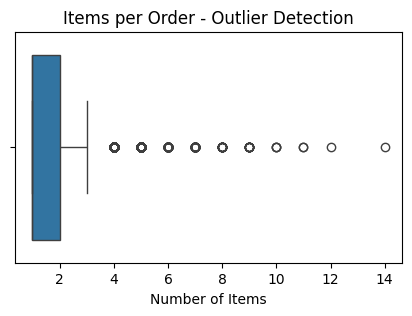

In [14]:
# Visualize Outliers in Items per Order
items_per_order = data['Order ID'].value_counts()
plt.figure(figsize=(5, 3))
sns.boxplot(x=items_per_order)
plt.title("Items per Order - Outlier Detection")
plt.xlabel("Number of Items")
plt.show()

In [15]:
# Count of Orders per Year
orders_per_year = data['Order_Year'].value_counts().reset_index()
orders_per_year.columns = ['Year', 'Order_Count']

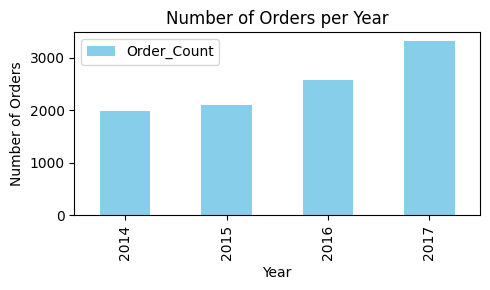

In [16]:
# Visualize Number of Orders per Year
orders_per_year.sort_values('Year').plot(kind='bar', x='Year', y='Order_Count', figsize=(5, 3), color='skyblue', title='Number of Orders per Year')
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

In [17]:
# Count Orders by Order Prefix (Region/Code)
data['Order_Prefix'].value_counts().reset_index()

,Order_Prefix,count
0,CA,8308
1,US,1686


In [18]:
# Extract Month from Order Date
data['Order_Month'] = data['Order Date'].dt.month

In [19]:
# Get Month with Highest Orders for Each Year
orders_per_month_year = data.groupby(['Order_Year', 'Order_Month']).size().reset_index(name='Order_Count')
orders_per_month_year.loc[orders_per_month_year.groupby('Order_Year')['Order_Count'].idxmax()].reset_index(drop=True)

,Order_Year,Order_Month,Order_Count
0,2014,11,318
1,2015,11,324
2,2016,11,370
3,2017,12,469


In [20]:
# Calculate Shipping Duration
data['Shipping_Duration'] = (data['Ship Date'] - data['Order Date']).dt.days
data['Shipping_Duration'].describe()

,Shipping_Duration
count,9994.000000
mean,3.958175
std,1.747567
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


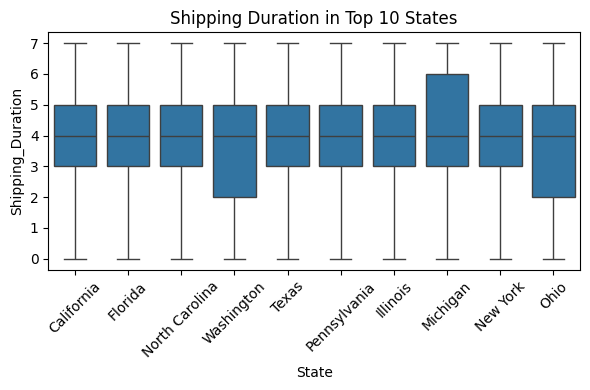

In [21]:
# Average Shipping Duration by State
plt.figure(figsize=(6, 4))
top_states = data['State'].value_counts().head(10).index
sns.boxplot(data=data[data['State'].isin(top_states)], x='State', y='Shipping_Duration')
plt.title("Shipping Duration in Top 10 States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

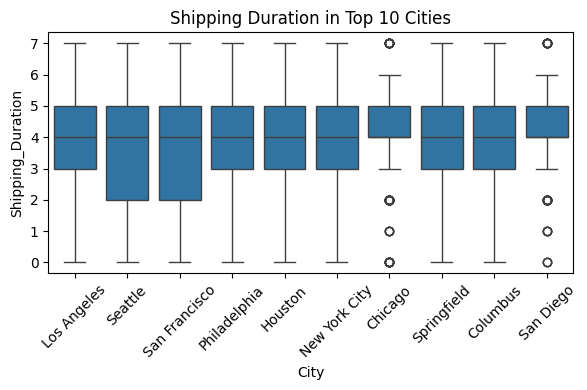

In [22]:
# Average Shipping Duration by City
plt.figure(figsize=(6, 4))
top_cities = data['City'].value_counts().head(10).index
sns.boxplot(data=data[data['City'].isin(top_cities)], x='City', y='Shipping_Duration')
plt.title("Shipping Duration in Top 10 Cities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
data['Ship Mode'].value_counts().reset_index()

,Ship Mode,count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


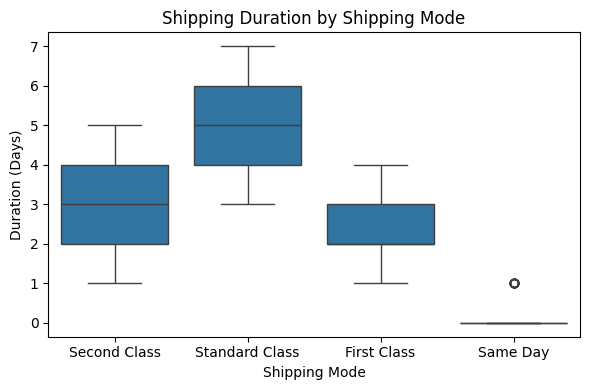

In [24]:
# Shipping Duration for each mode
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='Ship Mode', y='Shipping_Duration')
plt.title("Shipping Duration by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Duration (Days)")
plt.tight_layout()
plt.show()

In [25]:
customer_orders = data.groupby('Customer ID')['Order ID'].nunique()
repeat_customers = customer_orders[customer_orders > 1].count()
print("Number of Repeat Customers:", repeat_customers)

Number of Repeat Customers: 781


In [26]:
data.groupby('Segment')['Profit'].sum().reset_index()

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


In [27]:
data.groupby('Product ID')['Profit'].sum().reset_index().head()

,Product ID,Profit
0,FUR-BO-10000112,-117.8820
1,FUR-BO-10000330,24.1960
2,FUR-BO-10000362,311.1836
3,FUR-BO-10000468,-133.1092
4,FUR-BO-10000711,229.9752


In [28]:
# Loss-Making Orders
loss_orders = data[data['Profit'] < 0]
loss_orders[['Order ID', 'Sales', 'Discount', 'Profit']].head()

,Order ID,Sales,Discount,Profit
3,US-2015-108966,957.5775,0.45,-383.0310
14,US-2015-118983,68.8100,0.80,-123.8580
15,US-2015-118983,2.5440,0.80,-3.8160
23,US-2017-156909,71.3720,0.30,-1.0196
27,US-2015-150630,3083.4300,0.50,-1665.0522


In [29]:
# Remove Orders with Negative Profit
data = data[data['Profit'] >= 0]

In [30]:
# Split Product ID into Category, Sub-Category, and Code
data[['Prod_Category_Code', 'Prod_SubCategory_Code', 'Prod_Code']] = data['Product ID'].str.split('-', expand=True)

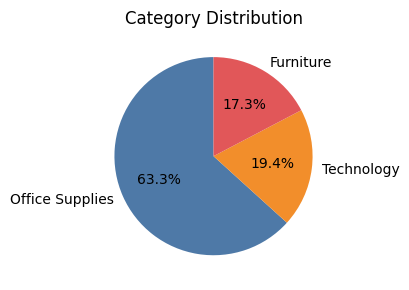

In [31]:
# Visualize Number of Orders by Category
category_counts = data['Category'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4e79a7','#f28e2b','#e15759'], figsize=(4,3))
plt.title("Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [32]:
# Top-Selling Product in Each Category
top_selling_products = (data.groupby(['Category', 'Product Name'], as_index=False)['Sales'].sum())

top_selling_products = (top_selling_products.loc[top_selling_products.groupby('Category')['Sales'].idxmax()]
    .sort_values('Category').reset_index(drop=True))

top_selling_products[['Category', 'Product Name', 'Sales']].sort_values('Sales', ascending=False)

,Category,Product Name,Sales
2,Technology,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Office Supplies,Fellowes PB500 Electric Punch Plastic Comb Bin...,25165.602
0,Furniture,HON 5400 Series Task Chairs for Big and Tall,14019.600


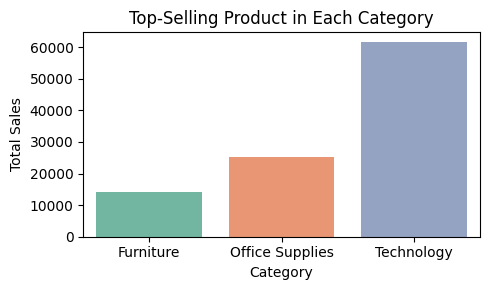

In [33]:
# Visualization of Top-Selling Product in Each Category
plt.figure(figsize=(5, 3))
sns.barplot(data=top_selling_products, x='Category', y='Sales', palette='Set2')
plt.title("Top-Selling Product in Each Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

In [34]:
# Top 5 Highest Spending Customers
top_customers = (data.groupby(['Customer ID', 'Customer Name'])
    .agg(Total_Sales=('Sales', 'sum'), Order_Count=('Order ID', 'nunique'))
    .reset_index().sort_values('Total_Sales', ascending=False).head(5))

customer_segments = data[['Customer ID', 'Segment']].drop_duplicates()
top_customers = top_customers.merge(customer_segments, on='Customer ID', how='left')
top_customers

,Customer ID,Customer Name,Total_Sales,Order_Count,Segment
0,TC-20980,Tamara Chand,19026.172,5,Corporate
1,RB-19360,Raymond Buch,15106.062,6,Consumer
2,TA-21385,Tom Ashbrook,14511.348,3,Home Office
3,AB-10105,Adrian Barton,13690.150,9,Consumer
4,KL-16645,Ken Lonsdale,13494.268,12,Consumer


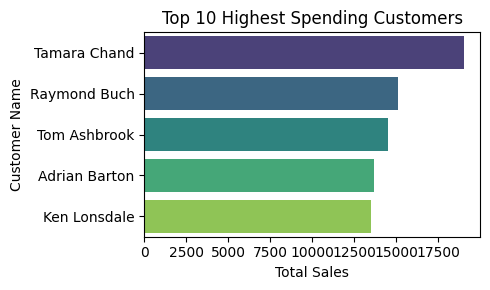

In [35]:
# Visualization of Top 5 Spending Customers
plt.figure(figsize=(5, 3))
sns.barplot(data=top_customers, y='Customer Name', x='Total_Sales', palette='viridis')
plt.title("Top 10 Highest Spending Customers")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

In [36]:
# Average discount & profit per order
disc_profit = data.groupby('Order ID').agg(
    Avg_Discount=('Discount', 'mean'),
    Total_Profit=('Profit', 'sum')
).reset_index()
disc_profit.head()

,Order ID,Avg_Discount,Total_Profit
0,CA-2014-100006,0.0,109.6113
1,CA-2014-100090,0.2,68.8464
2,CA-2014-100293,0.2,31.8696
3,CA-2014-100328,0.2,1.3257
4,CA-2014-100363,0.2,7.7192


In [37]:
# Profit per unit sold by product
data['Profit_per_Unit'] = data['Profit'] / data['Quantity']
data[['Product Name', 'Profit_per_Unit']].head()

,Product Name,Profit_per_Unit
0,Bush Somerset Collection Bookcase,20.9568
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73.1940
2,Self-Adhesive Address Labels for Typewriters b...,3.4357
4,Eldon Fold 'N Roll Cart System,1.2582
5,Eldon Expressions Wood and Plastic Desk Access...,2.0242


In [38]:
top_profit_per_unit = (
    data.groupby('Product Name').apply(lambda df: df['Profit'].sum() / df['Quantity'].sum())
    .reset_index(name='Profit_per_Unit').sort_values('Profit_per_Unit', ascending=False).head(10))
top_profit_per_unit

,Product Name,Profit_per_Unit
393,Canon imageCLASS 2200 Advanced Copier,1259.996400
394,Canon imageCLASS MF7460 Monochrome Digital Las...,997.995000
867,Ibico EPK-21 Electric Binding System,784.345850
762,HP Designjet T520 Inkjet Large Format Printer ...,559.996800
1793,Zebra ZM400 Thermal Label Printer,557.256000
630,Fellowes PB500 Electric Punch Plastic Comb Bin...,508.396000
663,GBC DocuBind P400 Electric Binding System,452.838491
668,GBC Ibimaster 500 Manual ProClick Binding System,344.679176
163,Ativa V4110MDD Micro-Cut Shredder,342.995100
955,Lexmark MX611dhe Monochrome Laser Printer,339.998000


In [39]:
# Sales vs Profit by Product
sales_profit = data.groupby('Product Name').agg( Total_Sales=('Sales', 'sum'),Total_Profit=('Profit', 'sum')).reset_index()
sales_profit.head()

,Product Name,Total_Sales,Total_Profit
0,"""While you Were Out"" Message Book, One Form pe...",25.228,10.3880
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,16.7678
2,#10 Self-Seal White Envelopes,108.682,52.1230
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,223.1408
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,115.2806


In [40]:
# Discount Impact: Correlation
data[['Discount', 'Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.070701
Profit,-0.070701,1.000000


In [41]:
# Average Discount and Profit by Category
data.groupby('Category')[['Discount', 'Profit']].mean().reset_index()

,Category,Discount,Profit
0,Furniture,0.075871,56.423157
1,Office Supplies,0.077938,34.845537
2,Technology,0.097716,116.773392


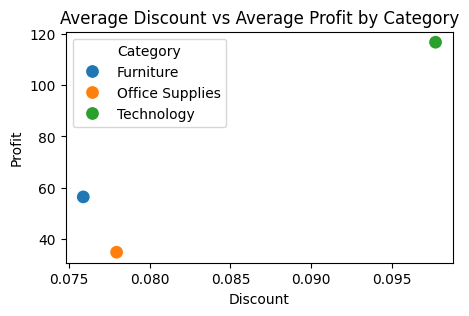

In [42]:
# Visualization of Average Discount and Profit by Category
plt.figure(figsize=(5, 3))
sns.scatterplot(data=data.groupby('Category')[['Discount','Profit']].mean().reset_index(),
                x='Discount', y='Profit', hue='Category', s=100)
plt.title("Average Discount vs Average Profit by Category")
plt.show()

In [43]:
# Shipping Mode Impact on Profit
data.groupby('Ship Mode')['Profit'].mean().reset_index()

,Ship Mode,Profit
0,First Class,57.534226
1,Same Day,55.707560
2,Second Class,49.860200
3,Standard Class,55.148556


In [44]:
# Late Shipping vs Profit
data.groupby('Shipping_Duration')['Profit'].mean().reset_index()

,Shipping_Duration,Profit
0,0,57.314838
1,1,39.628526
2,2,65.097439
3,3,48.312368
4,4,53.913268
5,5,50.503470
6,6,50.289251
7,7,72.773879


In [45]:
# Repeat Customer Rate
repeat_rate = data.groupby('Customer ID')['Order ID'].nunique().gt(1).mean()
print("Repeat Customer Rate:", repeat_rate)

Repeat Customer Rate: 0.9747474747474747


In [46]:
# Profitability by Region
data.groupby('Region')['Profit'].sum().reset_index()

,Region,Profit
0,Central,96021.2475
1,East,141113.3875
2,South,74254.2626
3,West,131139.4098


In [47]:
# Sub-Category Profit Stars
subcat = data.groupby('Sub-Category').apply(lambda df: df['Profit'].sum() / df['Quantity'].sum()).reset_index(name='Profit_per_Unit')
subcat.head()

,Sub-Category,Profit_per_Unit
0,Accessories,16.200779
1,Appliances,17.916765
2,Art,2.175929
3,Binders,19.537311
4,Bookcases,19.461099


In [48]:
# Seasonal Orders
data['Month'] = data['Order Date'].dt.month
data.groupby('Month')['Sales'].sum().reset_index()

,Month,Sales
0,1,74579.8720
1,2,52021.1430
2,3,147748.4020
3,4,109940.3970
4,5,133502.3515
5,6,129477.6675
6,7,118812.6750
7,8,129477.3910
8,9,227139.0005
9,10,163405.0550


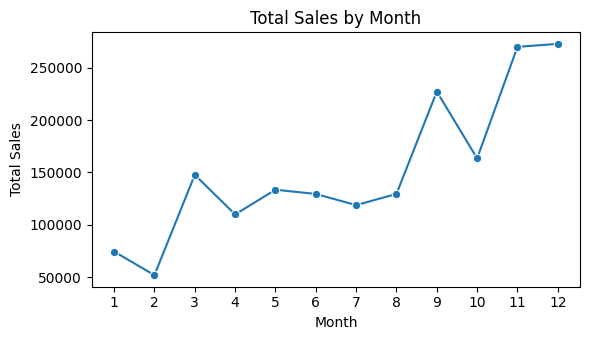

In [49]:
# Total Sales by Month
monthly_sales = (data.groupby('Month')['Sales'].sum().reset_index())
plt.figure(figsize=(6, 3.5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

### **✅ Conclusion**
The analysis shows discounts slightly hurt profit, Furniture has high discounts but low returns, and Technology drives strong profit. Some regions and cities underperform while others are clear profit centers.

### **💡 Recommendations**
*   Cut unnecessary discounts on low-margin items (like Furniture).
*   Focus on promoting high profit-per-unit products (like Technology).
*   Improve shipping times to reduce costs and boost profit.
*   Target profitable regions and customer segments for growth.
*   Use loyalty offers to increase repeat orders.